In [ ]:
# running qiime2-2020.2

In [ ]:
!qiime cutadapt trim-paired \
--i-demultiplexed-sequences /space/home/rosales/projects/2018_sediments_larvae/2020_analysis/demux.qza \
--p-cores 10 \
--p-front-f GTGYCAGCMGCCGCGGTAA \
--p-front-r GGACTACHVGGGTWTCTAAT \
--o-trimmed-sequences demux_trim_sed.qza 

In [ ]:
!qiime demux summarize \
--i-data demux_trim_sed.qza \
--o-visualization demux_trim_sed.qzv

In [ ]:
qiime dada2 denoise-paired \
--i-demultiplexed-seqs demux_trim_sed.qza \
--p-trunc-len-f 205 \
--p-trunc-len-r 78 \
--p-trim-left-f 12 \
--p-trim-left-r 19 \
--p-n-threads 10 \
--o-representative-sequences rep_seqs_sed.qza \
--o-table table_sed.qza \
--o-denoising-stats dada_stats_sed

In [ ]:
qiime feature-table summarize \
--i-table  table_sed.qza \
--o-visualization table_sed.qzv \
--m-sample-metadata-file  /space/home/rosales/projects/2018_sediments_larvae/Meta_sediment_larvae.txt



In [ ]:
qiime feature-classifier classify-sklearn \
--i-classifier /space/home/rosales/databases/silva-138-99-515-806-nb-classifier.qza \
--i-reads rep_seqs_sed.qza \
--p-n-jobs -7 \
--o-classification taxonomy_sed.qza

In [ ]:
qiime taxa barplot \
--i-table table_sed.qza \
--i-taxonomy \
taxonomy_sed.qza \
--m-metadata-file /space/home/rosales/projects/2018_sediments_larvae/Meta_sediment_larvae.txt \
--o-visualization taxa-bar

In [ ]:
qiime taxa filter-table \
--i-table table_sed.qza  \
--i-taxonomy taxonomy_sed.qza \
--p-exclude Mitochondria,Chloroplast \
--p-include d__Bacteria,d__Archaea \
--o-filtered-table table-Micro_sed.qza

In [ ]:
qiime taxa barplot \
--i-table table-Micro_sed.qza \
--i-taxonomy  taxonomy_sed.qza  \
--m-metadata-file /space/home/rosales/projects/2018_sediments_larvae/Meta_sediment_larvae.txt \
--o-visualization taxa-bar_micro

In [ ]:
qiime alignment mafft \
--i-sequences rep_seqs_sed.qza \
--o-alignment aligned_rep_seqs_sed.qza

qiime alignment mask \
--i-alignment aligned_rep_seqs_sed.qza \
--o-masked-alignment masked_aligned_rep_seqs_sed.qza

qiime phylogeny fasttree \
--i-alignment masked_aligned_rep_seqs_sed.qza \
--o-tree unroot_masked_aligned_rep_sed.qza

qiime phylogeny midpoint-root  --i-tree unroot_masked_aligned_rep_sed.qza --o-rooted-tree root_masked_aligned_rep_sed.qza

In [ ]:
qiime tools export --input-path table-Micro_sed.qza  --output-path exported_sed
qiime tools export --input-path root_masked_aligned_rep_sed.qza  --output-path exported_sed
qiime tools export --input-path taxonomy_sed.qza  --output-path exported_sed

In [2]:
%cd /Users/stephanie.rosales/Documents/sedimentXaymara/2020_analysis/
!pwd

/Users/stephanie.rosales/Documents/sedimentXaymara/2020_analysis
/Users/stephanie.rosales/Documents/sedimentXaymara/2020_analysis


In [6]:
!qiime feature-table summarize \
--i-table /Users/stephanie.rosales/Documents/sedimentXaymara/2020_analysis/table-Micro_sed.qza \
--o-visualization /Users/stephanie.rosales/Documents/sedimentXaymara/2020_analysis/table-Micro_sed.qzv \
--m-sample-metadata-file /Users/stephanie.rosales/Documents/sedimentXaymara/Meta_sediment_larvae.txt



Saved Visualization to: /Users/stephanie.rosales/Documents/sedimentXaymara/2020_analysis/table-Micro_sed.qzv


In [14]:
!qiime feature-table filter-features \
--i-table /Users/stephanie.rosales/Documents/sedimentXaymara/2020_analysis/table-Micro_sed.qza \
--p-min-samples 2 \
--p-min-frequency 2 \
--o-filtered-table table-Micro_sedFil2.qza


Saved FeatureTable[Frequency] to: table-Micro_sedFil2.qza


In [15]:
!qiime feature-table summarize \
--i-table table-Micro_sedFil2.qza \
--o-visualization table-Micro_sedFil2.qzv \
--m-sample-metadata-file /Users/stephanie.rosales/Documents/sedimentXaymara/Meta_sediment_larvae.txt


Saved Visualization to: table-Micro_sedFil2.qzv


In [12]:
!qiime feature-table rarefy \
--i-table table-Micro_sedFil2.qza \
--p-sampling-depth 46794 \
--o-rarefied-table table-Micro_sedFil2_rare.qza

!qiime feature-table summarize \
--i-table table-Micro_sedFil2_rare.qza \
--o-visualization table-Micro_sedFil2_rare.qzv \
--m-sample-metadata-file /Users/stephanie.rosales/Documents/sedimentXaymara/Meta_sediment_larvae.txt


Saved FeatureTable[Frequency] to: table-Micro_sedFil2_rare.qza
Saved Visualization to: table-Micro_sedFil2_rare.qzv


In [14]:
!qiime tools export --input-path table-Micro_sedFil2_rare.qza  --output-path /Users/stephanie.rosales/Documents/sedimentXaymara/2020_analysis/export_RARE


Exported table-Micro_sedFil2_rare.qza as BIOMV210DirFmt to directory /Users/stephanie.rosales/Documents/sedimentXaymara/2020_analysis/export_RARE


In [20]:
!biom  convert \
--input-fp /Users/stephanie.rosales/Documents/sedimentXaymara/2020_analysis/export_RARE/feature-table.biom \
--to-tsv \
-o /Users/stephanie.rosales/Documents/sedimentXaymara/2020_analysis/export_RARE/feature_rare_sed

In [29]:
!qiime feature-table filter-samples \
  --i-table table-Micro_sedFil2.qza \
  --m-metadata-file /Users/stephanie.rosales/Documents/sedimentXaymara/Meta_sediment_larvae.txt \
  --p-where "[Site]='Port'" \
  --o-filtered-table Port-tableFil2.qza

Saved FeatureTable[Frequency] to: Port-tableFil2.qza


In [5]:
!qiime aldex2 aldex2 \
    --i-table Port-tableFil2.qza \
    --m-metadata-file /Users/stephanie.rosales/Documents/sedimentXaymara/Meta_sediment_larvae.txt \
    --m-metadata-column Year \
    --output-dir aldex2

Saved FeatureData[Differential] to: aldex2/differentials.qza


In [7]:
!qiime aldex2 effect-plot \
    --i-table aldex2/differentials.qza \
    --o-visualization aldex2/differentials.qzv

Saved Visualization to: aldex2/differentials.qzv


In [9]:
!qiime aldex2 extract-differences \
    --i-table aldex2/differentials.qza \
    --o-differentials aldex2/sig_port \
    --p-sig-threshold 0.1 \
    --p-effect-threshold 0 \
    --p-difference-threshold 0

Saved FeatureData[Differential] to: aldex2/sig_port.qza


In [11]:
!qiime tools export \
    --input-path aldex2/sig_port.qza \
    --output-path aldex2/

Exported aldex2/sig_port.qza as DifferentialDirectoryFormat to directory aldex2/


In [15]:
!sourcetracker2 gibbs \
-i /Users/stephanie.rosales/Documents/sedimentXaymara/2020_analysis/export_RARE/feature-table.biom \
-m /Users/stephanie.rosales/Documents/sedimentXaymara/Meta_sediment_larvae.txt \
--output_dir /Users/stephanie.rosales/Documents/sedimentXaymara/2020_analysis/Source6

In [ ]:
!sourcetracker2 gibbs \
-i /Users/stephanie.rosales/Documents/sedimentXaymara/2020_analysis/export_RARE/feature-table.biom \
-m /Users/stephanie.rosales/Documents/sedimentXaymara/Meta_sediment_larvae.txt \
#--per_sink_feature_assignment \
--output_dir /Users/stephanie.rosales/Documents/sedimentXaymara/2020_analysis/Source2016

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [17]:
%cd /Users/stephanie.rosales/Documents/sedimentXaymara/2020_analysis/Source6

/Users/stephanie.rosales/Documents/sedimentXaymara/2020_analysis/Source6


In [18]:
results = pd.read_csv('mixing_proportions.txt', sep='\t', index_col=0)
results

,Port-2016,Port-2017,Unknown
SampleID,,,
R1B,0.0171,0.2256,0.7573
R1C,0.0427,0.2043,0.7530
R2B,0.0776,0.3102,0.6122
R2C,0.0914,0.2653,0.6433
E3,0.2695,0.1366,0.5939
E2,0.2629,0.1821,0.5550
E1,0.3422,0.1749,0.4829
E4,0.3313,0.1217,0.5470


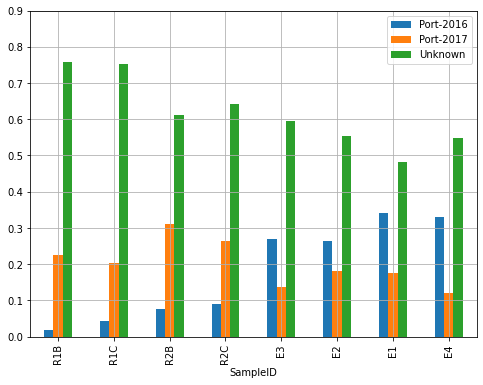

In [19]:
results.plot(kind='bar', grid=True, figsize=(8,6), ylim=(0,0.9))

In [20]:
stdevs = pd.read_csv('mixing_proportions_stds.txt', sep='\t', index_col=0)

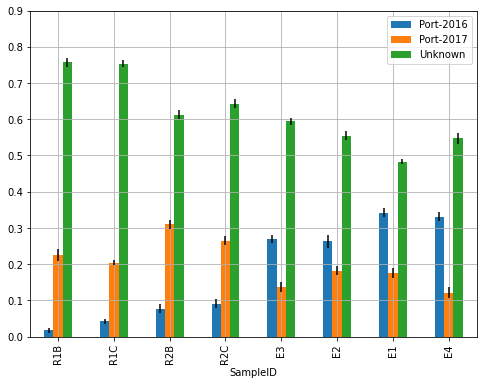

In [21]:
# Plot mixing proportions with yerr
results.plot(kind='bar', grid=True, figsize=(8,6), ylim=(0,0.9), yerr=stdevs)

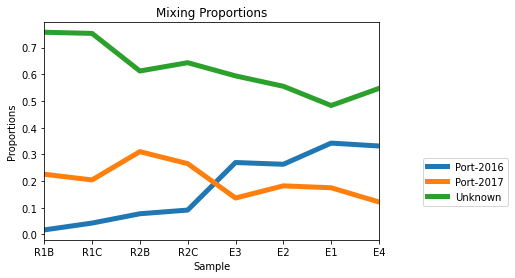

In [22]:
# set figure in matplotlib
fig, ax = plt.subplots(1,1)

# read in the dataframe
# use 'ax=ax' to assign the dataframe to the matplotlib axes object
results.plot(kind='line', lw=5, ax=ax)

# set options
ax.set_ylabel('Proportions')
ax.set_xlabel('Sample')
ax.set_title('Mixing Proportions')

# move legend
ax.legend(bbox_to_anchor=(1.4, 0.4))

In [23]:
!sourcetracker2 gibbs \
-i /Users/stephanie.rosales/Documents/sedimentXaymara/2020_analysis/export_RARE/feature-table.biom \
-m /Users/stephanie.rosales/Documents/sedimentXaymara/Meta_sediment_larvae.txt \
--output_dir /Users/stephanie.rosales/Documents/sedimentXaymara/2020_analysis/Source2016

In [24]:
%cd /Users/stephanie.rosales/Documents/sedimentXaymara/2020_analysis/Source2016/

/Users/stephanie.rosales/Documents/sedimentXaymara/2020_analysis/Source2016


In [25]:
results = pd.read_csv('mixing_proportions.txt', sep='\t', index_col=0)
results

,Port-2016,Unknown
SampleID,,
E3,0.3453,0.6547
E2,0.3535,0.6465
E1,0.3484,0.6516
E4,0.3760,0.6240


In [10]:
!sourcetracker2 \
-i /Users/stephanie.rosales/Documents/sedimentXaymara/2020_analysis/exported_sed/feature-table.biom\
-m /Users/stephanie.rosales/Documents/sedimentXaymara/Meta_sediment_larvae.txt \
--source_rarefaction_depth 72119 \
--per_sink_feature_assignments \
--output_dir /Users/stephanie.rosales/Documents/sedimentXaymara/2020_analysis/Sourcedev1